<a href="https://colab.research.google.com/github/Thachhcmute3001/AI/blob/main/Money_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [62]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI_project/Tientest/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5k'):
    output = 0
  if file.startswith('10k'):
    output = 1
  if file.startswith('20k'):
    output = 2
  if file.startswith('50k'):
    output = 3
  if file.startswith('100k'):
    output = 4
  if file.startswith('500k'):
    output = 5
  photo = load_img(folder + file, target_size=(200, 200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_project/AI_Lesson/TienVietNam/TienVietNam_photos.npy', photos)
save('/content/drive/MyDrive/AI_project/AI_Lesson/TienVietNam/TienVietNam_labels.npy', labels)

(540, 200, 200, 3) (540,)


In [105]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI_project/AI_Lesson/TienVietNam/TienVietNam_photos.npy')
labels = np.load('/content/drive/MyDrive/AI_project/AI_Lesson/TienVietNam/TienVietNam_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [106]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (200,200,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 200, 200, 8)       224       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 100, 100, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 100, 100, 16)      1168      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 conv2d_63 (Conv2D)          (None, 50, 50, 32)      

In [107]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")


In [113]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=34,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-113-561780b37c1f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/34
6/6 [==============================] - 8s 1s/step - loss: 0.1211 - accuracy: 0.9577 - val_loss: 0.0491 - val_accuracy: 0.9938
Epoch 2/34
6/6 [==============================] - 6s 913ms/step - loss: 0.1597 - accuracy: 0.9444 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 3/34
6/6 [==============================] - 6s 1s/step - loss: 0.0692 - accuracy: 0.9735 - val_loss: 0.0411 - val_accuracy: 0.9691
Epoch 4/34
6/6 [==============================] - 5s 840ms/step - loss: 0.0675 - accuracy: 0.9762 - val_loss: 0.0191 - val_accuracy: 0.9877
Epoch 5/34
6/6 [==============================] - 5s 848ms/step - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0.0370 - val_accuracy: 0.9753
Epoch 6/34
6/6 [==============================] - 6s 1s/step - loss: 0.0588 - accuracy: 0.9762 - val_loss: 0.0154 - val_accuracy: 0.9938
Epoch 7/34
6/6 [==============================] - 5s 847ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 8/34
6/6 [=============

In [114]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

6/6 [==============================] - 0s 13ms/step - loss: 26.5176 - accuracy: 0.9198
Accuracy: 0.9197530746459961
Loss: 26.517566680908203


In [118]:
#Save model
model.save('/content/drive/MyDrive/AI_project/Models/Tien.h5')

In [119]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI_project/Models/Tien.h5')

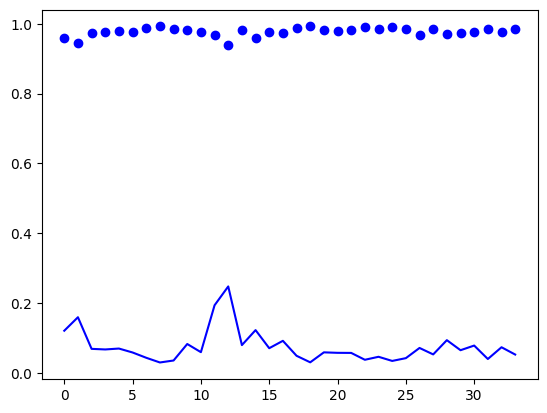

In [120]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

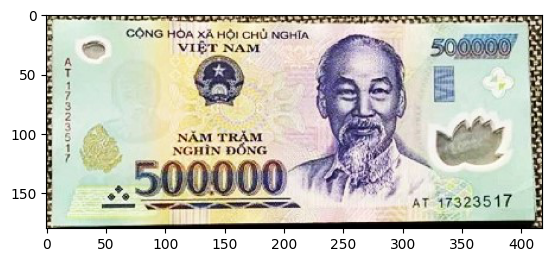

In [121]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = '500k.jpg'
img = load_img(url)
imshow(img)

1/1 [==============================] - 0s 100ms/step
Menh gia: 500k


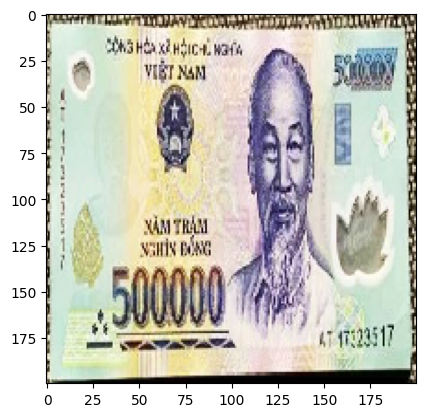

In [122]:
img = load_img(url, target_size = (200,200))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img), axis = -1)
if(a == array([0])):
  print("Menh gia: 5k")
if(a == array([1])):
  print("Menh gia: 10k")
if(a == array([2])):
  print("Menh gia: 20k")
if(a == array([3])):
  print("Menh gia: 50k")
if(a == array([4])):
  print("Menh gia: 100k")
if(a == array([5])):
  print("Menh gia: 500k")